# Tensorflow Tutorial 06
参考文献
- [302_simple_classification.py](https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/302_simple_classification.py)

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [0]:
tf.set_random_seed(1)
np.random.seed(1)

In [0]:
# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(2*n_data, 1) # class0 x shape = (100, 2)
y0 = np.zeros(100) # class0 y shape = (100, )
x1 = np.random.normal(-2*n_data, 1) # class1 x shape = (100, 2)
y1 = np.ones(100) # class1 y shape = (100, )
x = np.vstack((x0, x1)) # shape (200, 2)
y = np.hstack((y0, y1))

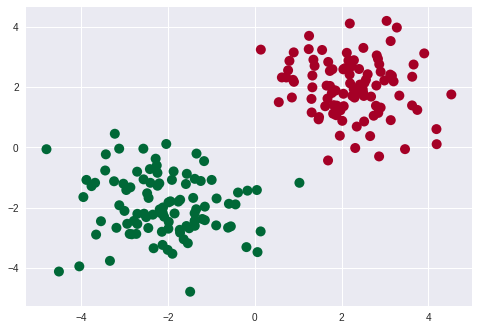

In [4]:
# plot data
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [0]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

[tf.squeezeはsizeが1の次元を削除し次元数を減らすAPIとなります。](https://ja.stackoverflow.com/questions/31635/tensorflow-%E3%81%AE-tf-squeeze-%E3%81%AF%E3%81%A9%E3%81%AE%E3%82%88%E3%81%86%E3%81%AA%E5%87%A6%E7%90%86%E3%82%92%E8%A1%8C%E3%81%86%E3%82%82%E3%81%AE%E3%81%A7%E3%81%97%E3%82%87%E3%81%86%E3%81%8B)

In [0]:
# neural network layers
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output = tf.layers.dense(l1, 2)

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits =output)
# return (acc, update_op) and create 2 local variables
accuracy = tf.metrics.accuracy(labels= tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

In [0]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

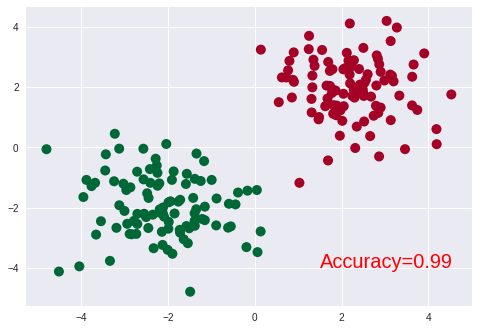

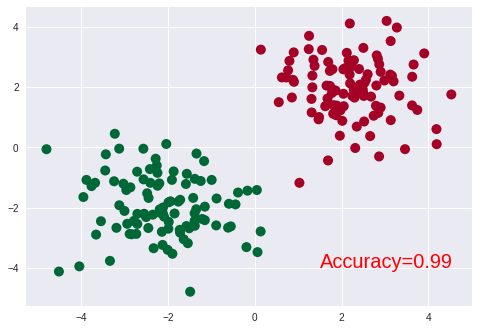

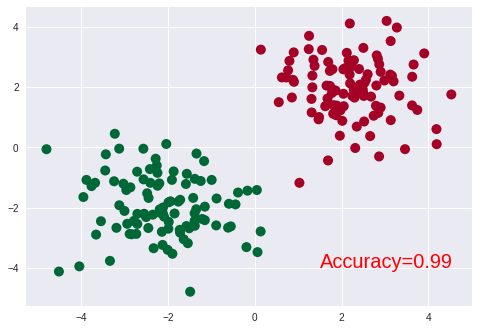

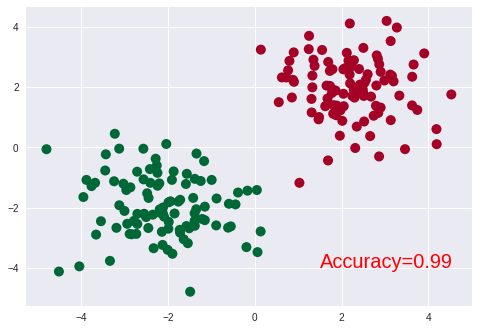

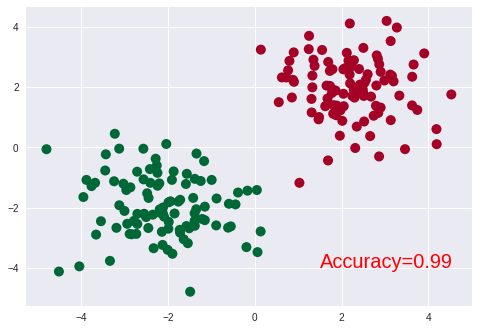

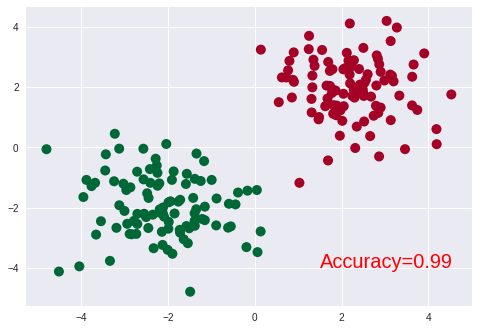

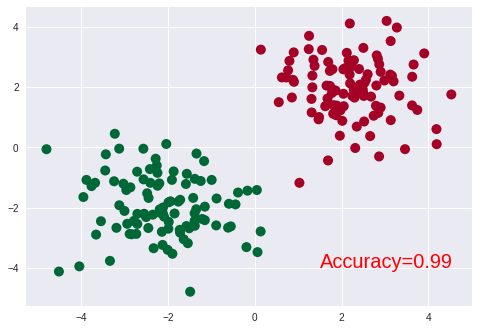

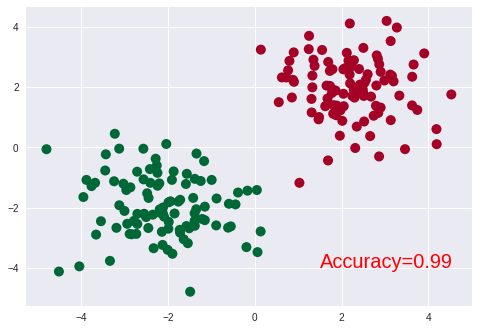

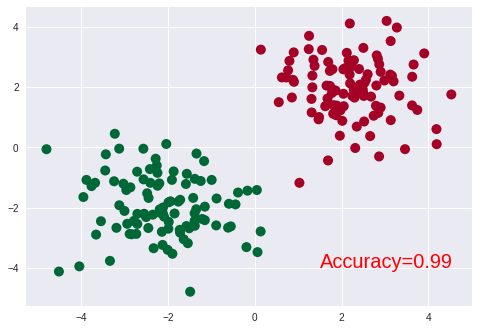

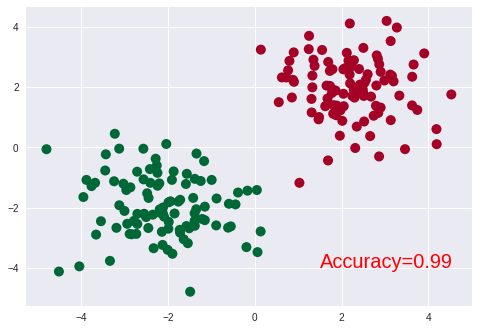

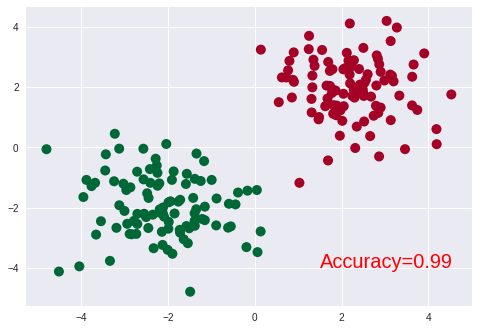

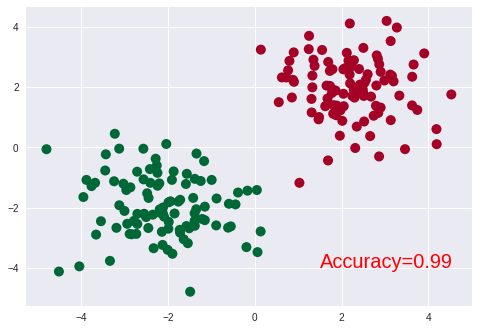

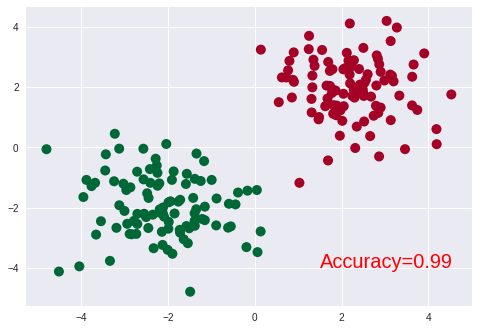

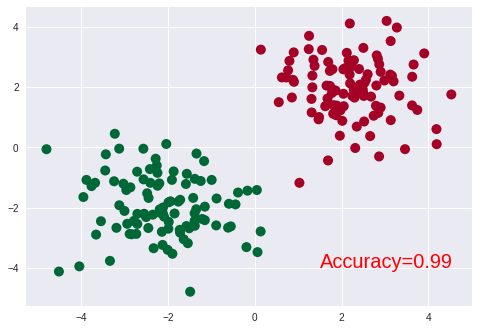

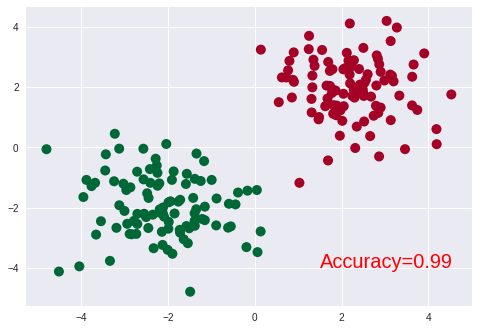

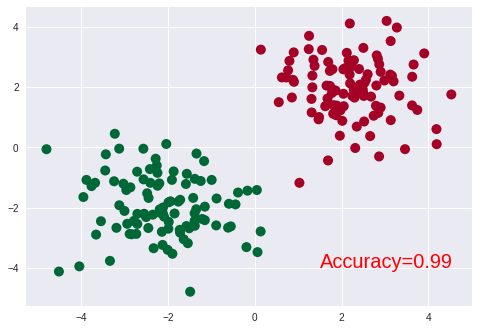

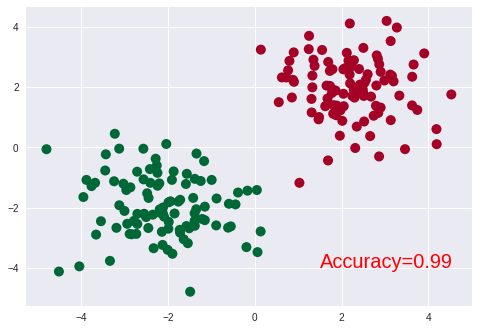

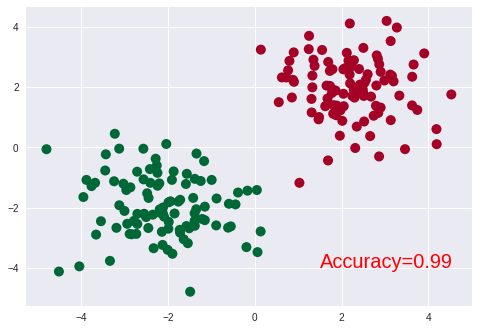

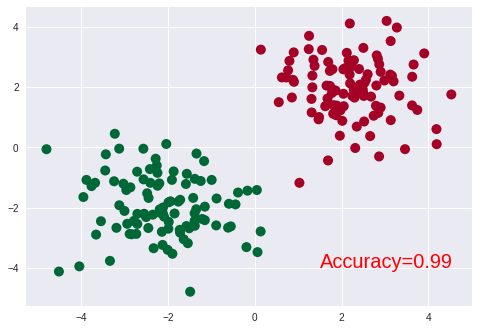

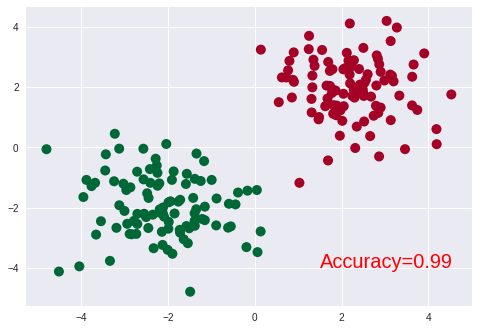

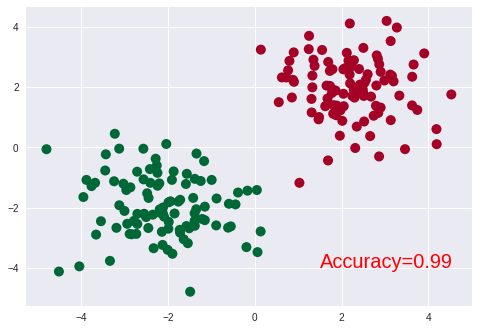

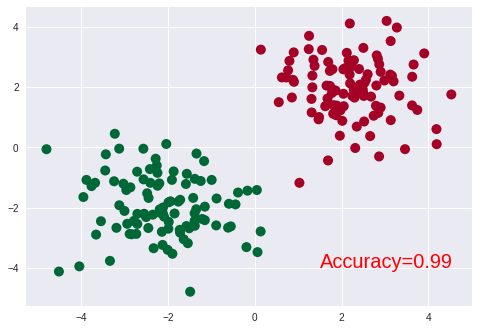

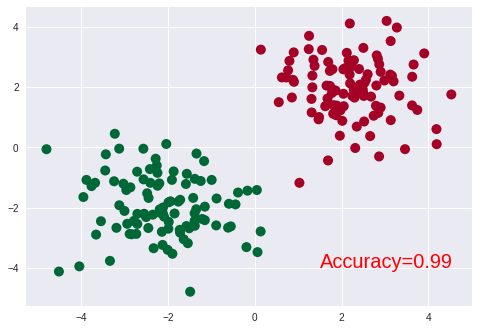

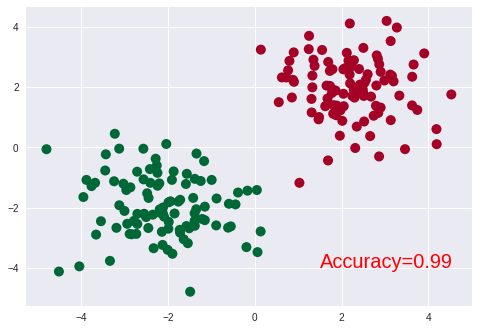

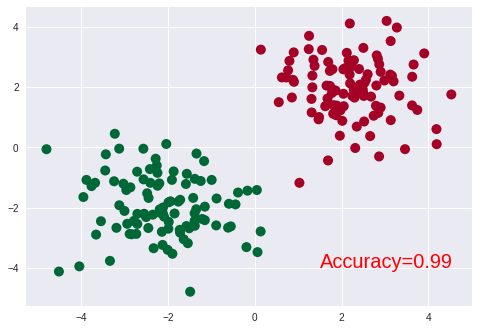

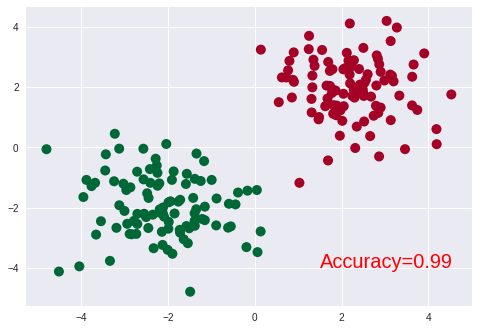

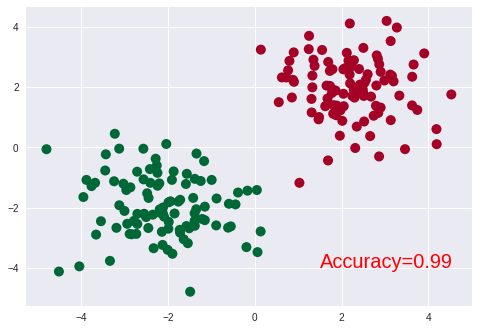

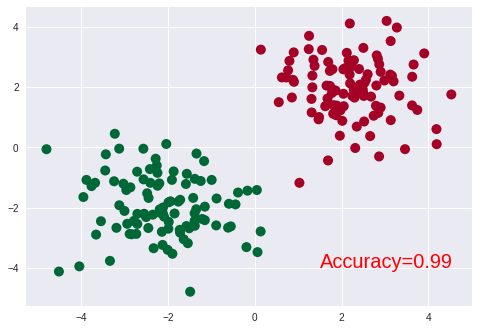

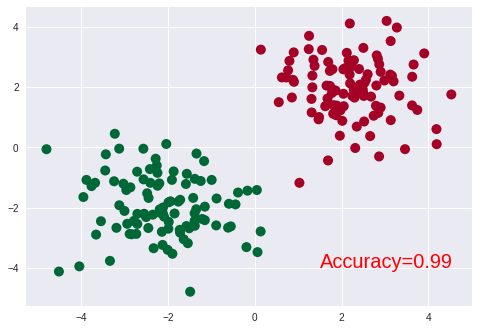

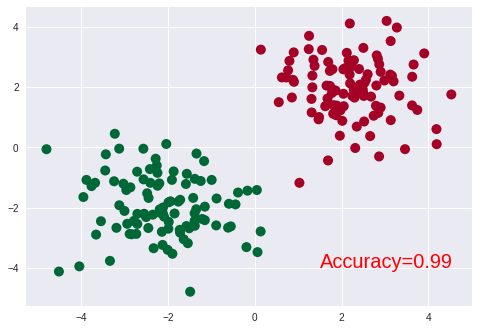

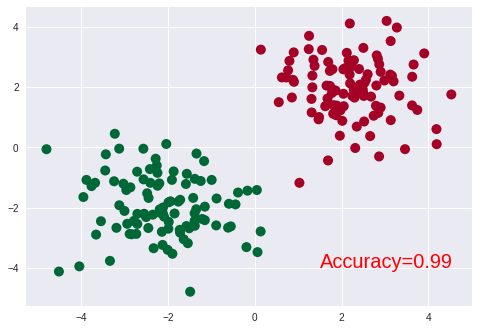

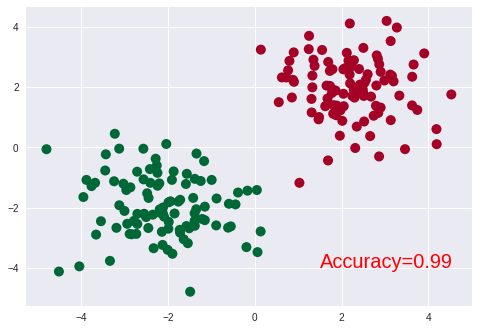

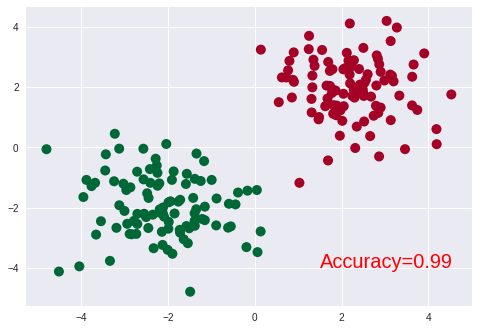

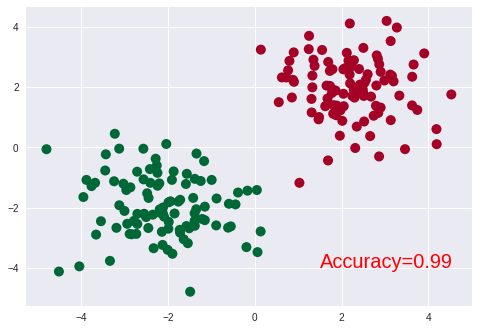

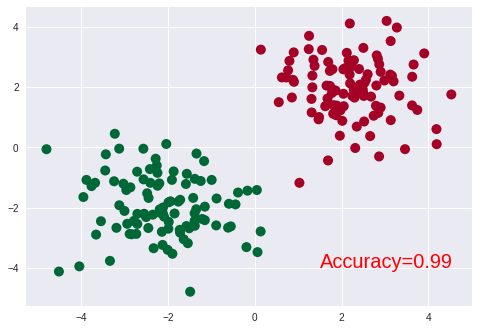

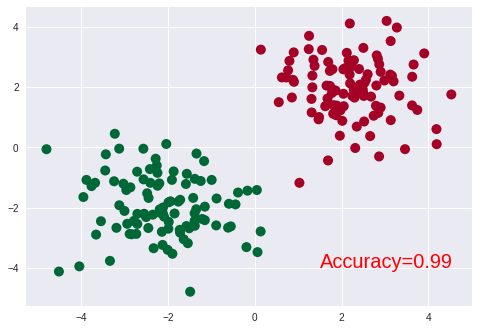

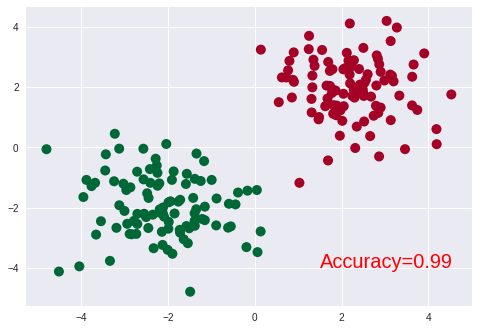

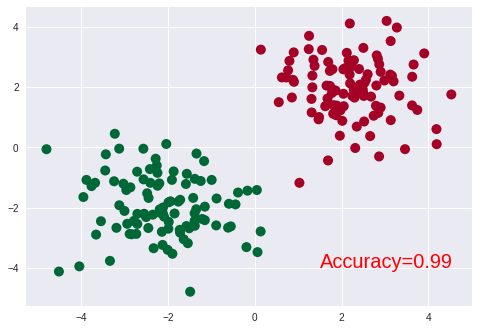

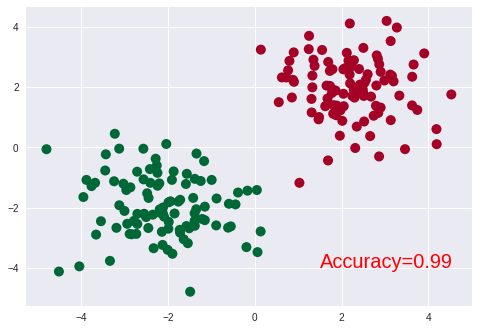

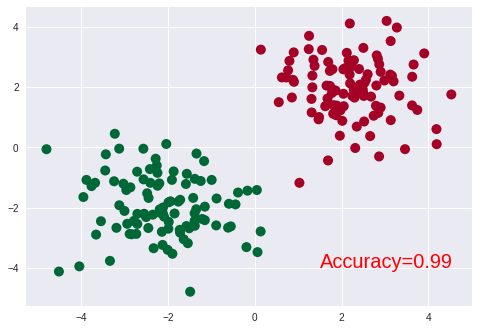

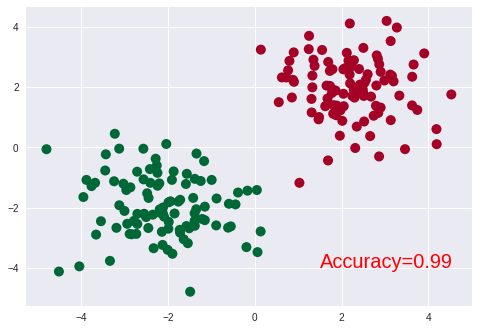

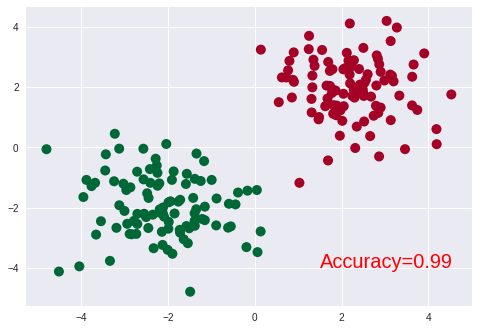

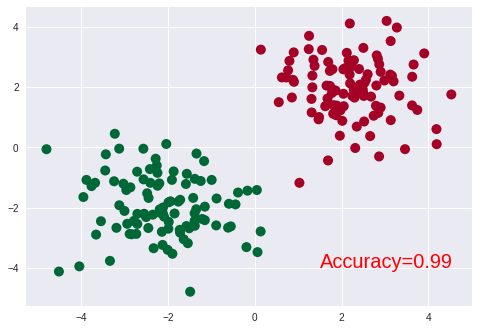

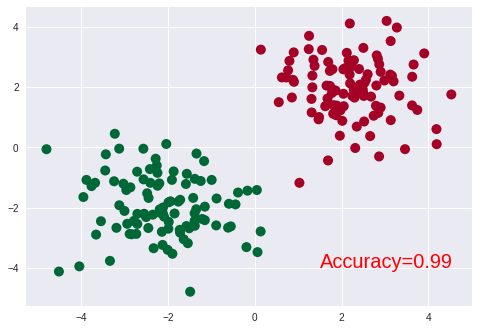

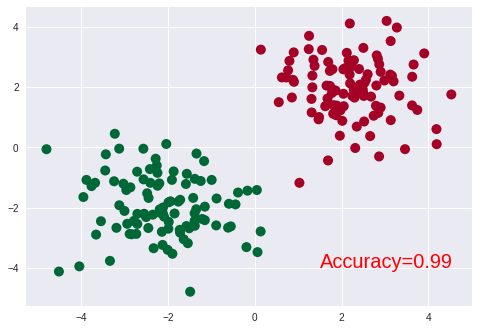

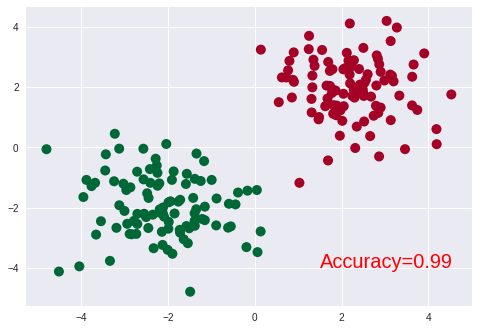

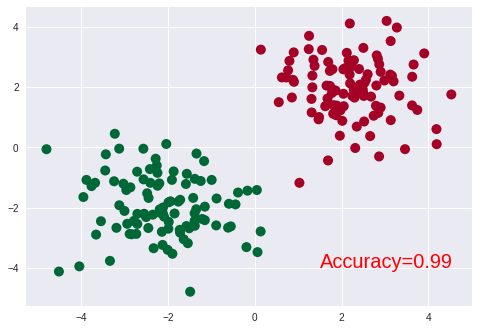

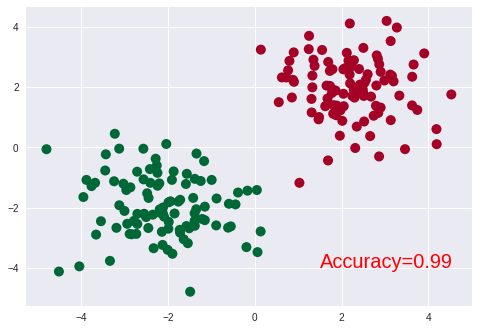

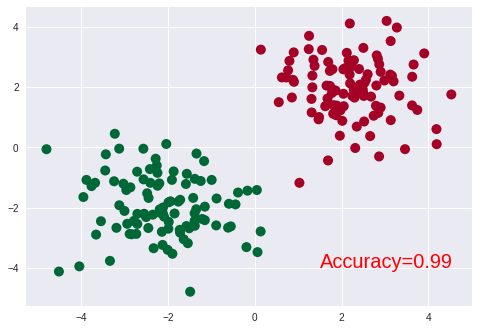

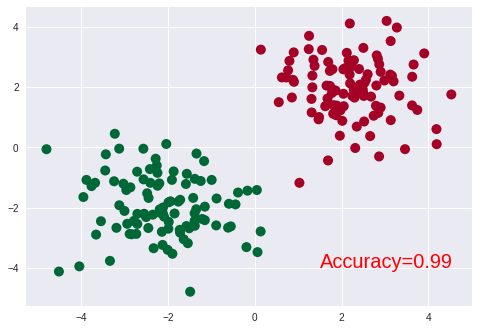

In [12]:
plt.ion()
for step in range(100):
  # train and net output
  _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y:y})
  if step%2 == 0:
    # plot and show learning process
    plt.cla()
    plt.scatter(x[:,0], x[:,1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
    plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size':20, 'color':'red'})
    plt.pause(0.1)
    
plt.ioff()
plt.show()